In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from clawpack import pyclaw
from clawpack import riemann

In [2]:
num_waves = 3
num_eqn   = 3

# Conserved quantities
density = 0
momentum = 1
energy = 2

In [3]:
# specify the Riemann solver
riemann_solver = riemann.euler_1D_py.euler_roe_1D
#riemann_solver = riemann.euler_1D_py.euler_hll_1D
#riemann_solver = riemann.euler_1D_py.euler_hllc_1D
solver = pyclaw.ClawSolver1D(riemann_solver)
kernel_language='Python' # have to specify the kernel language for the euler_1D_py solvers
solver.kernel_language = kernel_language
solver.order = 1 # First order Godunov's method
#solver.order = 2 # Second order Lax-Wendroff-LeVeque method
#solver.limiters = 1 # minmod
#solver.limiters = 2 # superbee
#solver.limiters = 3 # van leer

In [4]:
# Specify the boundary conditions
#solver.all_bcs = pyclaw.BC.periodic
solver.all_bcs = pyclaw.BC.extrap

In [5]:
# Set up the domain
nx = 100;
x = pyclaw.Dimension(-1.0,1.0,nx,name='x')
domain = pyclaw.Domain([x])

In [6]:
# Set up the state (container for the conserved variables, q, as well as auxillary data)
state = pyclaw.State(domain,num_eqn)
gamma = 1.4
state.problem_data['gamma'] = gamma
state.problem_data['gamma1'] = gamma - 1.
state.problem_data['efix'] = 0

In [7]:
# Set initial conditions
x=domain.grid.x.centers
rho_l = 1.; rho_r = 1./8
p_l = 1.; p_r = 0.1
state.q[density ,:] = (x<0.)*rho_l + (x>=0.)*rho_r
state.q[momentum,:] = 0.
velocity = state.q[momentum,:]/state.q[density,:]
pressure = (x<0.)*p_l + (x>=0.)*p_r
state.q[energy  ,:] = pressure/(gamma - 1.) + 0.5 * state.q[density,:] * velocity**2

In [8]:
# Set up a PyClaw controller to run the problem and store the solution
claw = pyclaw.Controller()
claw.tfinal = 0.4
claw.solution = pyclaw.Solution(state,domain)
claw.solver = solver
claw.num_output_times = 10
claw.keep_copy = True
claw.output_format = None

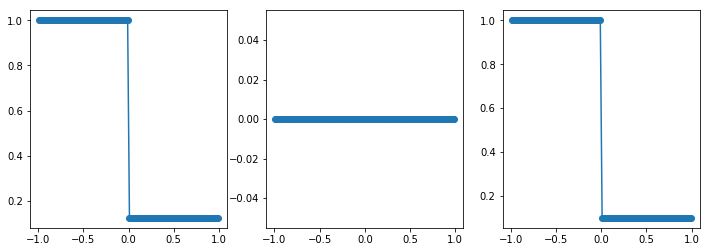

In [9]:
# Plot the initial density, velocity, and pressure
d = claw.solution.q[density,:]
v = claw.solution.q[momentum,:] / d
p = (claw.solution.q[energy,:] - 0.5 * d * v**2) * (gamma - 1.)
fig = plt.figure(figsize=(12, 4))
ax1 = plt.subplot(131)
ax1.plot(x, d, '-o')
ax2 = plt.subplot(132)
ax2.plot(x, v, '-o')
ax3 = plt.subplot(133)
ax3.plot(x, p, '-o')

In [10]:
status = claw.run()

2019-06-24 12:22:43,007 INFO CLAW: Solution 0 computed for time t=0.000000
2019-06-24 12:22:43,012 INFO CLAW: Solution 1 computed for time t=0.040000
2019-06-24 12:22:43,016 INFO CLAW: Solution 2 computed for time t=0.080000
2019-06-24 12:22:43,020 INFO CLAW: Solution 3 computed for time t=0.120000
2019-06-24 12:22:43,025 INFO CLAW: Solution 4 computed for time t=0.160000
2019-06-24 12:22:43,029 INFO CLAW: Solution 5 computed for time t=0.200000
2019-06-24 12:22:43,033 INFO CLAW: Solution 6 computed for time t=0.240000
2019-06-24 12:22:43,037 INFO CLAW: Solution 7 computed for time t=0.280000
2019-06-24 12:22:43,040 INFO CLAW: Solution 8 computed for time t=0.320000
2019-06-24 12:22:43,044 INFO CLAW: Solution 9 computed for time t=0.360000
2019-06-24 12:22:43,048 INFO CLAW: Solution 10 computed for time t=0.400000


In [11]:
from matplotlib import animation
from clawpack.visclaw.JSAnimation import IPython_display

2019-06-24 12:22:46,225 INFO CLAW: Animation.save using <class 'clawpack.visclaw.JSAnimation.html_writer.HTMLWriter'>



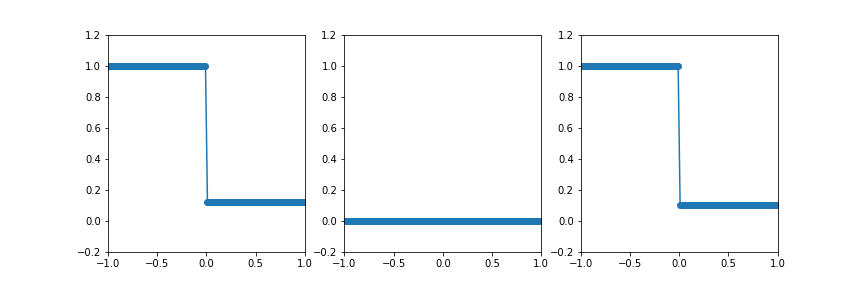
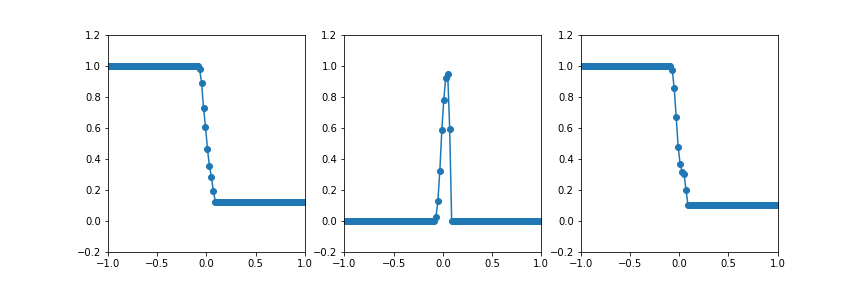
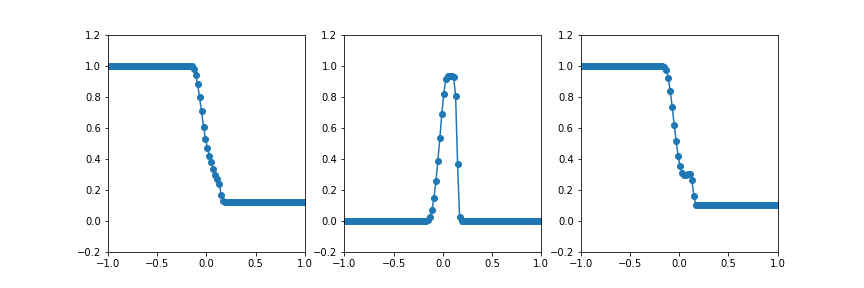
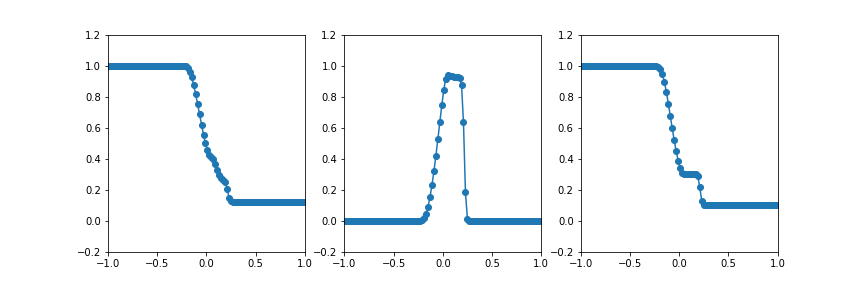
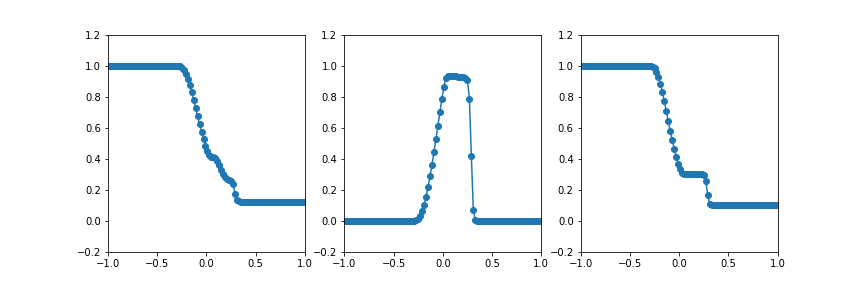
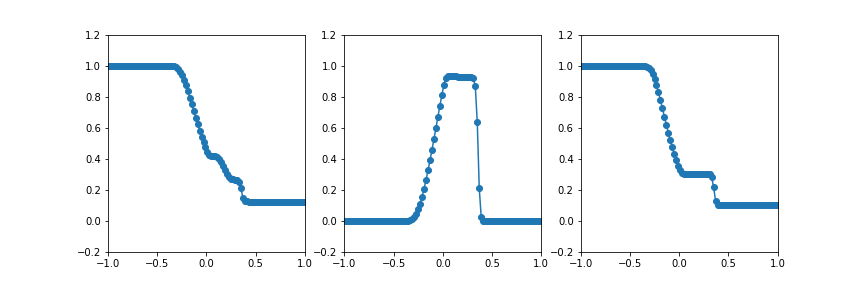
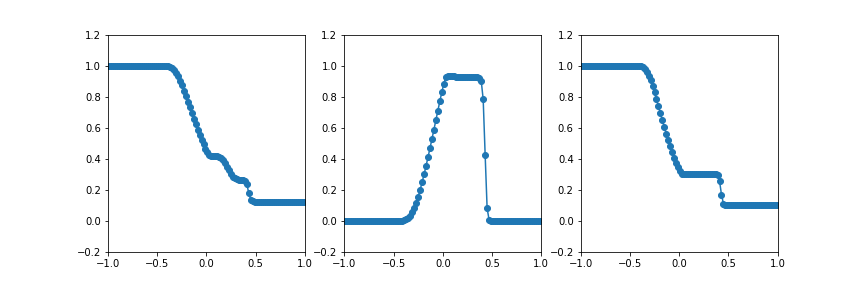
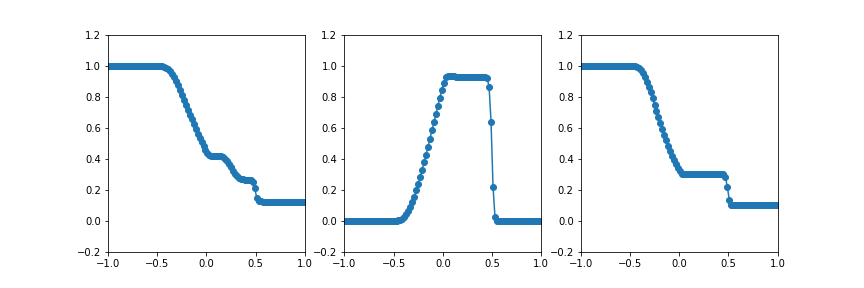
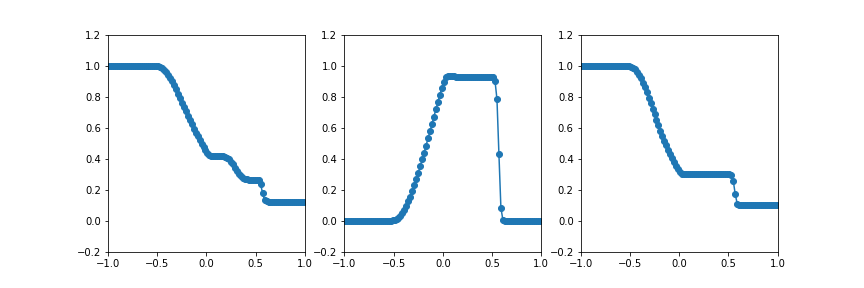
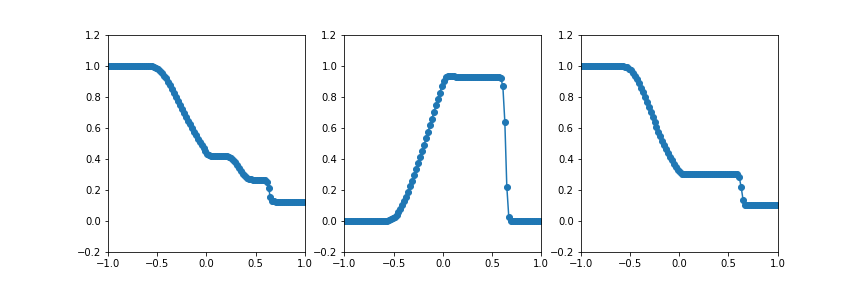
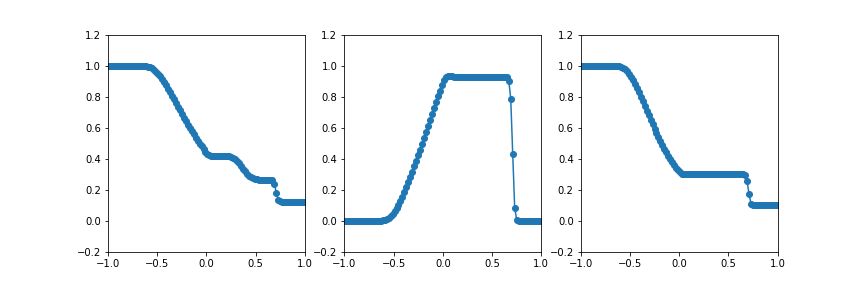

In [12]:
#ax = plt.axes(xlim=(-1, 1), ylim=(-0.2, 1.2))
fig = plt.figure(figsize=(12, 4))
ax1 = plt.subplot(131)
ax1.set_xlim(-1,1)
ax1.set_ylim(-0.2, 1.2)
ax2 = plt.subplot(132)
ax2.set_xlim(-1,1)
ax2.set_ylim(-0.2, 1.2)
ax3 = plt.subplot(133)
ax3.set_xlim(-1,1)
ax3.set_ylim(-0.2, 1.2)

frame = claw.frames[0]
d = frame.q[density,:]
v = frame.q[momentum,:] / d
p = (frame.q[energy,:] - 0.5 * d * v**2) * (gamma - 1.)
line1, = ax1.plot([], [], '-o')
line2, = ax2.plot([], [], '-o')
line3, = ax3.plot([], [], '-o')

def fplot(frame_number):
    frame = claw.frames[frame_number]
    d = frame.q[density,:]
    v = frame.q[momentum,:] / d
    p = (frame.q[energy,:] - 0.5 * d * v**2) * (gamma - 1.)    
    line1.set_data(x, d)
    line2.set_data(x, v)
    line3.set_data(x, p)
    return line1, line2, line3

animation.FuncAnimation(fig, fplot, frames=len(claw.frames), interval=300)